## Churn Prediction 

### Problem Statment

Churn analysis is a critical process for telecom companies as it helps them identify customers who are likely to leave the service provider and take their business elsewhere. It involves analyzing customer behavior and usage patterns to identify factors that lead to churn and developing strategies to retain customers.
Churn analysis is crucial for the telecom industry as it is directly related to the profitability and sustainability of a telecom company. A high churn rate can lead to a decline in revenue and market share,
while a low churn rate can help companies retain their customers and gain a competitive edge. 
It is vital for the telecom industry to analyze the churn rate, understand the reasons for it, and take the necessary steps to retain customers.

In [ ]:
# importing required libraries

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re

In [ ]:
#reading the dataset

In [64]:
df=pd.read_csv("churn_dataset.csv")

In [65]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Cleanning

In [ ]:
#MultipleLines,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,OnlineBackup
#cleanning above columes with required information and removing excess data

In [67]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [68]:
df["MultipleLines"]=df["MultipleLines"].apply(lambda x:'No' if x =='No phone service' else x)
df["OnlineSecurity"]=df["OnlineSecurity"].apply(lambda x:'No' if x=='No internet service' else x)
df["DeviceProtection"]=df["DeviceProtection"].apply(lambda x:'No' if x=='No internet service' else x)
df["TechSupport"]=df["TechSupport"].apply(lambda x:'No' if x =='No internet service' else x)
df["StreamingTV"]=df["StreamingTV"].apply(lambda x:'No' if x =='No internet service' else x)
df["StreamingMovies"]=df["StreamingMovies"].apply(lambda x:'No' if x=='No internet service' else x)
df["OnlineBackup"]=df["OnlineBackup"].apply(lambda x:'No' if x=='No internet service' else x)


In [ ]:
# After filling with required data for each column

In [69]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [70]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
# Filling empty(" ") rows with np.nan value

In [71]:
df["TotalCharges"]=df["TotalCharges"].apply(lambda x:np.nan if x==" " else x)

In [72]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Changing the Data type accordingly

In [73]:
df["tenure"]=df["tenure"].astype(np.int64)
df["SeniorCitizen"]=df["SeniorCitizen"].astype(np.int64)
df["TotalCharges"]=df["TotalCharges"].astype(np.float64)

In [74]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#making  the cleanned data into different csv

In [75]:
df.to_csv("cleanned_data.csv")

In [76]:
df_cleanned=pd.read_csv("cleanned_data.csv")

In [77]:
df_cleanned.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

In [78]:
df_cleanned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [79]:
df_cleanned.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

## visualization

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Finding of most and least  used  payments   based on gender 

In [81]:
df_payment=df_cleanned.groupby(['gender',"PaymentMethod"]).size().reset_index(name='count')

In [82]:
df_payment

,gender,PaymentMethod,count
0,Female,Bank transfer (automatic),788
1,Female,Credit card (automatic),752
2,Female,Electronic check,1170
3,Female,Mailed check,778
4,Male,Bank transfer (automatic),756
5,Male,Credit card (automatic),770
6,Male,Electronic check,1195
7,Male,Mailed check,834


C:\Users\HIKI\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\HIKI\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


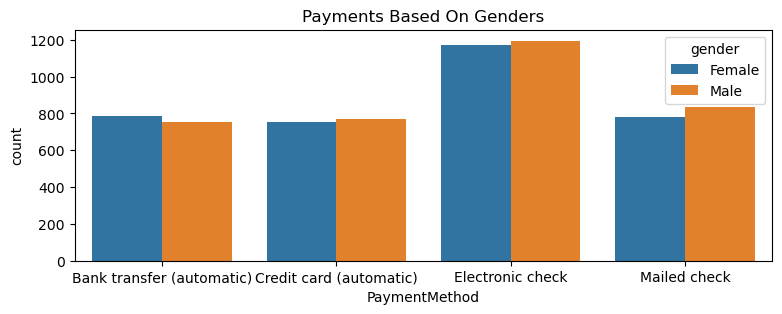

In [127]:
plt.figure(figsize=(9,3))
sns.barplot(x='PaymentMethod',y='count' ,data=df_payment,hue='gender')
plt.title("Payments Based On Genders")
plt.show()

* From the above bar plot we can see that both gender has a high useability  of electronic check 

In [ ]:
#Most used InternetService based on gender and its TotalCharges

In [84]:
one=df_cleanned.groupby(['InternetService','gender'])['TotalCharges'].mean().reset_index()

In [85]:
one

,InternetService,gender,TotalCharges
0,DSL,Female,2137.621242
1,DSL,Male,2102.652029
2,Fiber optic,Female,3166.033645
3,Fiber optic,Male,3244.830006
4,No,Female,676.354424
5,No,Male,654.489018


C:\Users\HIKI\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\HIKI\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


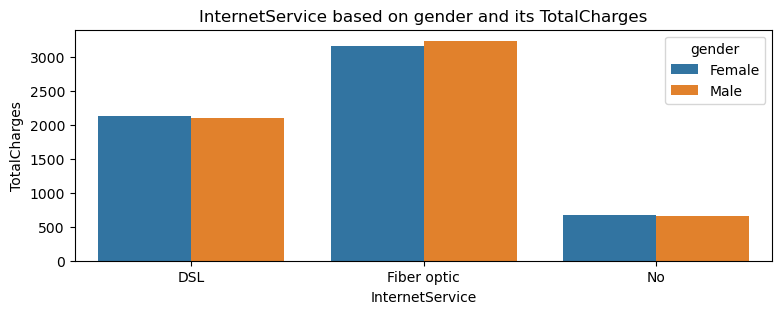

In [129]:
plt.figure(figsize=(9,3))
sns.barplot(x='InternetService',y='TotalCharges' ,data=one,hue='gender')
plt.title("InternetService based on gender and its TotalCharges")
plt.show()

* from the above graph we can say that  fiber optic internetservice is the most used service by both genders compared to other  and it got higest total charges to.


In [136]:
#Churn percentage based on every column in the data frame

In [144]:
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["tomato", "lightblue"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

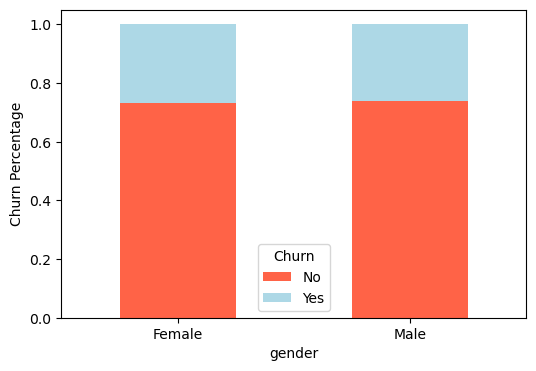

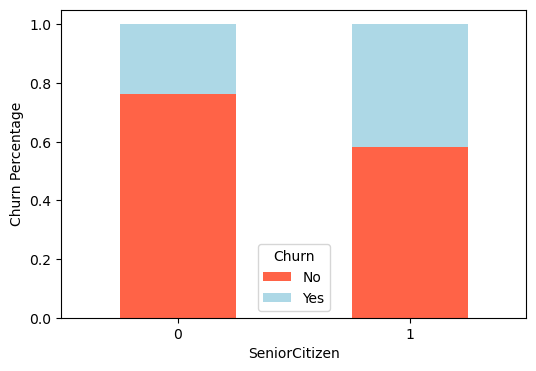

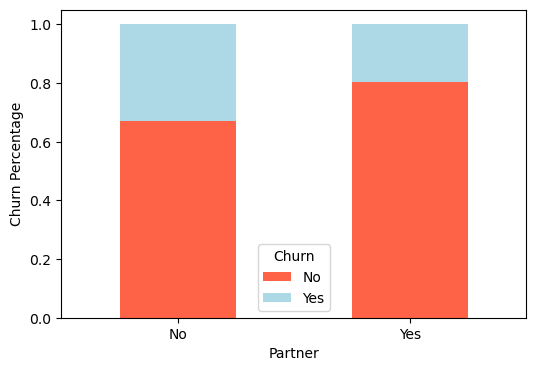

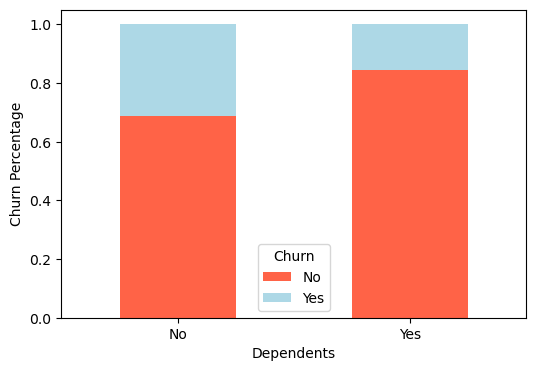

In [145]:
stacked_plot(df_cleanned, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

In [ ]:
#Distribution of Total charges 

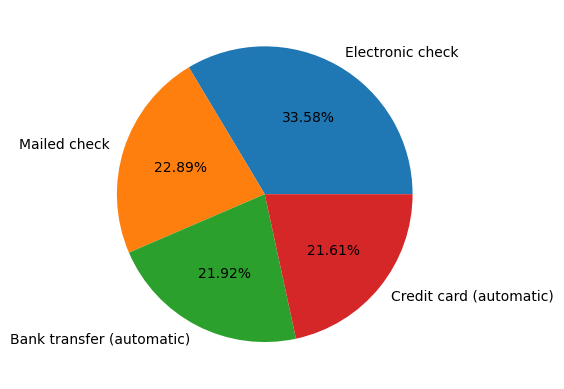

In [89]:
plt.pie(df_cleanned['PaymentMethod'].value_counts(),labels=df_cleanned['PaymentMethod'].unique(),autopct='%1.2f%%')
plt.show()

* From the above pie chart electric check was most used payment method

In [139]:
chrn_Contract=df_cleanned.groupby(['Contract','Churn']).size().reset_index(name="count")

C:\Users\HIKI\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\HIKI\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


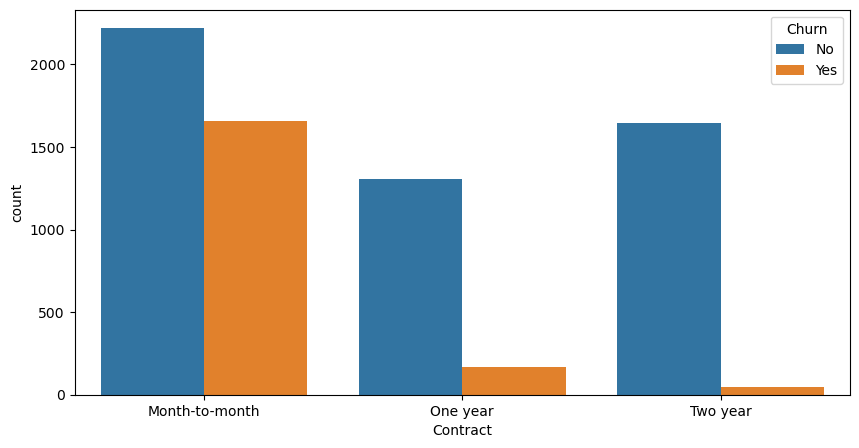

In [140]:
plt.figure(figsize=(10,5))
sns.barplot(x='Contract',y='count' ,data=chrn_Contract,hue='Churn')
plt.show()

* from the above graph we can see that  contract for 2 years has least churn yes  compared to other
* And compared to two and one year month_to_month most churn yes 

In [92]:
df_cleanned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [146]:
#Filling Null Values Using Knn Imputer 

In [93]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
oe=OneHotEncoder(drop="first" ,sparse=False)

In [ ]:
# Seperating Object data from dataset

In [94]:
cati=df_cleanned.select_dtypes(['object'])

In [95]:
cati

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [147]:
#Seperating Numeric and flot data from  dataset

In [96]:
numi=df_cleanned.select_dtypes(['int','float'])

In [ ]:
#Finding total number of null Values 

In [97]:
numi.isna().sum()

SeniorCitizen      0
tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [ ]:
#Converting object data into onehotencoding using onehotencoder libray

In [98]:
oe_cati=pd.DataFrame(oe.fit_transform(cati),index=cati.index,columns=oe.get_feature_names_out(cati.columns))

In [ ]:
#Standazitation of numerical and float  data type

In [99]:
num_sc=pd.DataFrame(sc.fit_transform(numi),index=numi.index,columns=numi.columns)

In [ ]:
#Filling the null values using knn_neighbour (fit,Transform)

In [100]:
knn=KNNImputer(n_neighbors=3,add_indicator=True)

In [101]:
knn.fit(num_sc)

KNNImputer(add_indicator=True, n_neighbors=3)

In [102]:
num_sc_null_fix=pd.DataFrame(knn.transform(num_sc),index=num_sc.index)

In [103]:
num_sc_null_fix.drop([4],axis=1,inplace=True)

In [104]:
num_sc_null_fix.columns=num_sc.columns

In [105]:
num_sc_null_fix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994194
1,-0.439916,0.066327,-0.259629,-0.173740
2,-0.439916,-1.236724,-0.362660,-0.959649
3,-0.439916,0.514251,-0.746535,-0.195248
4,-0.439916,-1.236724,0.197365,-0.940457
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129180
7039,-0.439916,1.613701,1.277533,2.241056
7040,-0.439916,-0.870241,-1.168632,-0.854514
7041,2.273159,-1.155283,0.320338,-0.872095


In [ ]:
#Checking null values

In [106]:
num_sc_null_fix.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [ ]:
#Merging both Standardized and onehotencoded dataframes together

In [107]:
df_no_nullvalues=num_sc_null_fix.merge(oe_cati,left_index=True,right_index=True)

In [108]:
df_no_nullvalues.to_csv('df_no_nullvalues.csv')

In [109]:
df_2=pd.read_csv('df_no_nullvalues.csv')
df_2.drop('Unnamed: 0',axis=1,inplace=True)
df_2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.439916,-1.277445,-1.160323,-0.994194,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.439916,0.066327,-0.259629,-0.173740,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.439916,-1.236724,-0.362660,-0.959649,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-0.439916,0.514251,-0.746535,-0.195248,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.439916,-1.236724,0.197365,-0.940457,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129180,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,-0.439916,1.613701,1.277533,2.241056,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,-0.439916,-0.870241,-1.168632,-0.854514,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,2.273159,-1.155283,0.320338,-0.872095,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


##### Splitting data into train and test 

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(df_2.drop('Churn_Yes', axis=1),\
                                                   df_2['Churn_Yes'], test_size=0.25,random_state=16)

In [120]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

## Building models using Train and Test Data

#### Model using LogisticRegression finding accuracy_score,precision_score,recall_score,f1_score

In [121]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)
y_pred_lr=logisticRegr.predict(X_test)
L_accuracy_score=accuracy_score(Y_test,y_pred_lr)
L_precision_score=precision_score(Y_test,y_pred_lr)
L_recall_score=recall_score(Y_test,y_pred_lr)
L_f1_score=f1_score(Y_test,y_pred_lr)

#### Model using DecisionTreeRegressor finding accuracy_score,precision_score,recall_score,f1_score

In [113]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(X_train, Y_train)
y_pred_d = dr.predict(X_test)
dr_accuracy_score=accuracy_score(Y_test, y_pred_d.round())
dr_precision_score=precision_score(Y_test, y_pred_d.round())
dr_recall_score=recall_score(Y_test, y_pred_d.round())
dr_f1_score=f1_score(Y_test, y_pred_d.round())

#### Model using RandomForestRegressor finding accuracy_score,precision_score,recall_score,f1_score

In [114]:
from sklearn.ensemble import RandomForestRegressor
rrr = RandomForestRegressor()
rrr.fit(X_train, Y_train)
y_pred_rf=rrr.predict(X_test)
rrr_accuracy_score=accuracy_score(Y_test, y_pred_rf.round())
rrr_precision_score=precision_score(Y_test, y_pred_rf.round())
rrr_recall_score=recall_score(Y_test, y_pred_rf.round())
rrr_f1_score=f1_score(Y_test, y_pred_rf.round())

#### Model using KNeighborsClassifier finding accuracy_score,precision_score,recall_score,f1_score

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)    
predicted = knn.predict(X_test)
knn_accuracy_score=accuracy_score(Y_test, predicted)
knn_precision_score=precision_score(Y_test, predicted)
knn_recall_score=recall_score(Y_test, predicted)
knn_f1_score=f1_score(Y_test, predicted)

C:\Users\HIKI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Model using SVC(Support Vector Classification ) finding accuracy_score,precision_score,recall_score,f1_score

In [116]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, Y_train)
sv_pred=sv.predict(X_test)
svc_accuracy_score=accuracy_score(Y_test, sv_pred)
svc_precision_score=precision_score(Y_test, sv_pred,average='weighted',zero_division=0)
svc_recall_score=recall_score(Y_test, sv_pred,average='weighted',zero_division=0)
svc_f1_score=f1_score(Y_test, sv_pred,average='weighted',zero_division=0)

In [151]:
# Creating a dataframe using all the modules accuracy_score,precision_score,recall_score,f1_score

In [152]:
final_df=pd.DataFrame({"Algorithm":["Knn","logisticregression","SVM","DecissionTree","RandomForest"],
                      "Accuracy":[knn_accuracy_score,L_accuracy_score,svc_accuracy_score,dr_accuracy_score,rrr_accuracy_score],
                      "Precision":[knn_precision_score,L_precision_score,svc_precision_score,dr_precision_score,rrr_precision_score],
                      "Recall":[knn_recall_score,L_recall_score,svc_recall_score,dr_recall_score,rrr_recall_score]})

In [154]:
final_df

,Algorithm,Accuracy,Precision,Recall
0,Knn,0.758660,0.532359,0.559211
1,logisticregression,0.800681,0.627737,0.565789
2,SVM,0.798978,0.787327,0.798978
3,DecissionTree,0.736513,0.492337,0.563596
4,RandomForest,0.783078,0.593434,0.515351


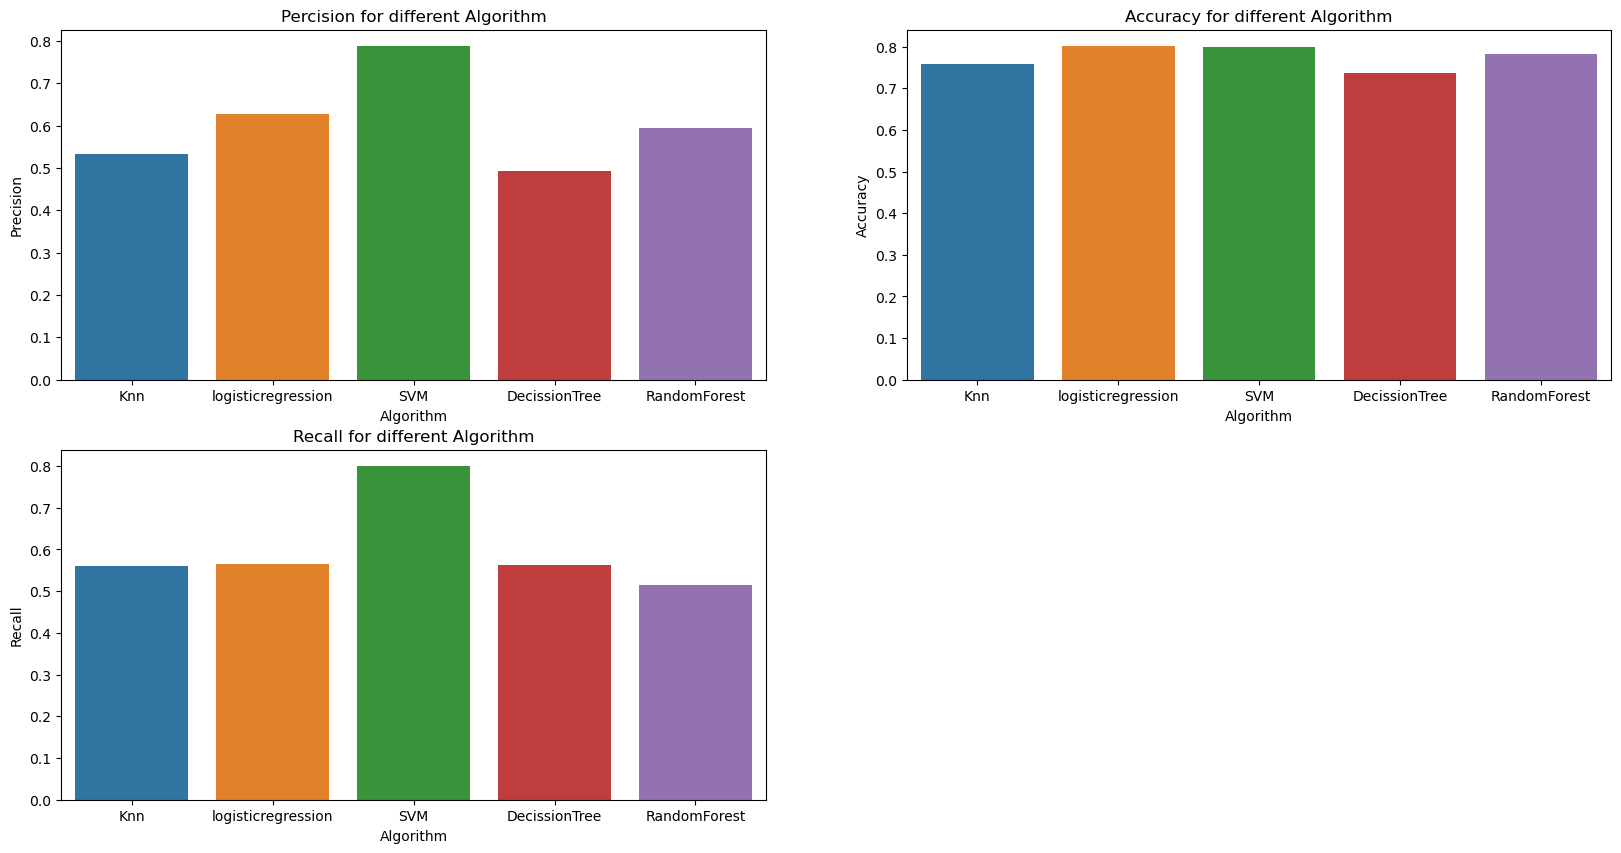

In [164]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("Percision for different Algorithm")
sns.barplot(data=final_df,x="Algorithm",y="Precision")
plt.subplot(2,2,2)
plt.title("Accuracy for different Algorithm")
sns.barplot(data=final_df,x="Algorithm",y="Accuracy")
plt.subplot(2,2,3)

plt.title("Recall for different Algorithm")
sns.barplot(data=final_df,x="Algorithm",y="Recall")
plt.show()

* From the above first  graph higest Percision  is for svm compared to other Algorithm 
* And least Percision is for Decission Tree
* From the above second graph higest Accuracy is for logistic_regression 
* And the least Accuracy is for DecissionTree compared to other
* From the above Third graph higest Recall is for Svm  
* And the least Recall is for Randomforest  compared to other